In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
sp500 = pd.read_csv("^GSPC_2000~2018.csv")
sp500.index = sp500.Date.map(lambda x : pd.Timestamp(x))
del sp500['Date']
del sp500['Adj Close']
sp500.Volume = sp500.Volume / 1e9

In [4]:
for i in range(1, 11):
    sp500['returnsCloseNext{}'.format(i)] = np.log(sp500['Close'].shift(-1*i) / sp500['Open'])
    
sp500["pct_change"] = sp500.Close.pct_change()
for i in range(3, 31, 2):
    sp500["close_ma_{}".format(i)] = \
      sp500.Close.rolling(window = i).mean()
for i in [7, 21, 30, 60, 90, 91, 100, 120]:
    sp500["his_vol_{}".format(i)] = \
      sp500["pct_change"].rolling(window = i).std()*(252**0.5)
for i in [1, 3, 5, 7, 10, 12, 14]:
    sp500['returnsCC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Close.shift(i))
    sp500['returnsOO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Open.shift(i))
    sp500['returnsCO{}'.format(i)] = \
      np.log(sp500.Open / sp500.Close.shift(i))
    sp500['returnsOC{}'.format(i)] = \
      np.log(sp500.Close / sp500.Open.shift(i))

In [5]:
y_li = [col for col in sp500.columns if col.find('Next') != -1]
X_li = [col for col in sp500.columns if col.find('Next') == -1]

In [6]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [8]:
import time
look_back = 100

sp500 = sp500.dropna()
sp500_data = sp500[X_li]

result = pd.DataFrame(columns = y_li,
                      index = sp500_data.index)
trial = 0
start = time.time()
const = 0
loop_size = (len(sp500_data) - look_back - 1 - const)

k = 10
sp500_label = sp500['returnsCloseNext{}'.format(k)]
for i in range(len(sp500_data) - look_back - 1 -const):
    semi_start = time.time()
    xgb_reg = XGBRegressor()
    xgb_reg.fit(sp500_data.iloc[i:i+look_back],
                sp500_label.iloc[i:i+look_back])
    pred = xgb_reg.predict(
        sp500_data.iloc[i+look_back+k:i+look_back+1+k])
    result.iloc[look_back+i-1+(k*2)][sp500_label.name] = pred[0]
    del xgb_reg
    trial += 1
    semi_elapse = time.time() - semi_start
    print('Done {} / {}'.format(trial, loop_size))
    print('\t {:.4f} sec'.format(semi_elapse))
elapse = time.time() - start

Done 1 / 4298
	 0.1037 sec
Done 2 / 4298
	 0.0479 sec
Done 3 / 4298
	 0.0469 sec
Done 4 / 4298
	 0.0459 sec
Done 5 / 4298
	 0.0499 sec
Done 6 / 4298
	 0.0549 sec
Done 7 / 4298
	 0.0469 sec
Done 8 / 4298
	 0.0459 sec
Done 9 / 4298
	 0.0468 sec
Done 10 / 4298
	 0.0469 sec
Done 11 / 4298
	 0.0598 sec
Done 12 / 4298
	 0.0529 sec
Done 13 / 4298
	 0.0478 sec
Done 14 / 4298
	 0.0479 sec
Done 15 / 4298
	 0.0489 sec
Done 16 / 4298
	 0.0608 sec
Done 17 / 4298
	 0.0539 sec
Done 18 / 4298
	 0.0538 sec
Done 19 / 4298
	 0.0529 sec
Done 20 / 4298
	 0.0618 sec
Done 21 / 4298
	 0.0509 sec
Done 22 / 4298
	 0.0489 sec
Done 23 / 4298
	 0.0519 sec
Done 24 / 4298
	 0.0578 sec
Done 25 / 4298
	 0.0469 sec
Done 26 / 4298
	 0.0469 sec
Done 27 / 4298
	 0.0448 sec
Done 28 / 4298
	 0.0598 sec
Done 29 / 4298
	 0.0459 sec
Done 30 / 4298
	 0.0469 sec
Done 31 / 4298
	 0.0469 sec
Done 32 / 4298
	 0.0469 sec
Done 33 / 4298
	 0.0508 sec
Done 34 / 4298
	 0.0489 sec
Done 35 / 4298
	 0.0449 sec
Done 36 / 4298
	 0.0459 sec
D

Done 289 / 4298
	 0.0518 sec
Done 290 / 4298
	 0.0459 sec
Done 291 / 4298
	 0.0469 sec
Done 292 / 4298
	 0.0479 sec
Done 293 / 4298
	 0.0459 sec
Done 294 / 4298
	 0.0489 sec
Done 295 / 4298
	 0.0459 sec
Done 296 / 4298
	 0.0469 sec
Done 297 / 4298
	 0.0489 sec
Done 298 / 4298
	 0.0459 sec
Done 299 / 4298
	 0.0479 sec
Done 300 / 4298
	 0.0469 sec
Done 301 / 4298
	 0.0489 sec
Done 302 / 4298
	 0.0479 sec
Done 303 / 4298
	 0.0499 sec
Done 304 / 4298
	 0.0578 sec
Done 305 / 4298
	 0.0449 sec
Done 306 / 4298
	 0.0459 sec
Done 307 / 4298
	 0.0448 sec
Done 308 / 4298
	 0.0499 sec
Done 309 / 4298
	 0.0459 sec
Done 310 / 4298
	 0.0459 sec
Done 311 / 4298
	 0.0459 sec
Done 312 / 4298
	 0.0459 sec
Done 313 / 4298
	 0.0499 sec
Done 314 / 4298
	 0.0469 sec
Done 315 / 4298
	 0.0459 sec
Done 316 / 4298
	 0.0449 sec
Done 317 / 4298
	 0.0459 sec
Done 318 / 4298
	 0.0479 sec
Done 319 / 4298
	 0.0458 sec
Done 320 / 4298
	 0.0469 sec
Done 321 / 4298
	 0.0459 sec
Done 322 / 4298
	 0.0459 sec
Done 323 / 429

Done 573 / 4298
	 0.0458 sec
Done 574 / 4298
	 0.0429 sec
Done 575 / 4298
	 0.0439 sec
Done 576 / 4298
	 0.0419 sec
Done 577 / 4298
	 0.0449 sec
Done 578 / 4298
	 0.0439 sec
Done 579 / 4298
	 0.0439 sec
Done 580 / 4298
	 0.0438 sec
Done 581 / 4298
	 0.0429 sec
Done 582 / 4298
	 0.0419 sec
Done 583 / 4298
	 0.0429 sec
Done 584 / 4298
	 0.0429 sec
Done 585 / 4298
	 0.0419 sec
Done 586 / 4298
	 0.0419 sec
Done 587 / 4298
	 0.0429 sec
Done 588 / 4298
	 0.0429 sec
Done 589 / 4298
	 0.0429 sec
Done 590 / 4298
	 0.0419 sec
Done 591 / 4298
	 0.0449 sec
Done 592 / 4298
	 0.0428 sec
Done 593 / 4298
	 0.0439 sec
Done 594 / 4298
	 0.0539 sec
Done 595 / 4298
	 0.0419 sec
Done 596 / 4298
	 0.0429 sec
Done 597 / 4298
	 0.0419 sec
Done 598 / 4298
	 0.0459 sec
Done 599 / 4298
	 0.0439 sec
Done 600 / 4298
	 0.0438 sec
Done 601 / 4298
	 0.0419 sec
Done 602 / 4298
	 0.0459 sec
Done 603 / 4298
	 0.0429 sec
Done 604 / 4298
	 0.0459 sec
Done 605 / 4298
	 0.0429 sec
Done 606 / 4298
	 0.0419 sec
Done 607 / 429

Done 856 / 4298
	 0.0468 sec
Done 857 / 4298
	 0.0439 sec
Done 858 / 4298
	 0.0439 sec
Done 859 / 4298
	 0.0439 sec
Done 860 / 4298
	 0.0439 sec
Done 861 / 4298
	 0.0448 sec
Done 862 / 4298
	 0.0449 sec
Done 863 / 4298
	 0.0448 sec
Done 864 / 4298
	 0.0439 sec
Done 865 / 4298
	 0.0429 sec
Done 866 / 4298
	 0.0439 sec
Done 867 / 4298
	 0.0499 sec
Done 868 / 4298
	 0.0448 sec
Done 869 / 4298
	 0.0429 sec
Done 870 / 4298
	 0.0429 sec
Done 871 / 4298
	 0.0469 sec
Done 872 / 4298
	 0.0439 sec
Done 873 / 4298
	 0.0429 sec
Done 874 / 4298
	 0.0449 sec
Done 875 / 4298
	 0.0458 sec
Done 876 / 4298
	 0.0439 sec
Done 877 / 4298
	 0.0439 sec
Done 878 / 4298
	 0.0448 sec
Done 879 / 4298
	 0.0439 sec
Done 880 / 4298
	 0.0479 sec
Done 881 / 4298
	 0.0439 sec
Done 882 / 4298
	 0.0449 sec
Done 883 / 4298
	 0.0429 sec
Done 884 / 4298
	 0.0439 sec
Done 885 / 4298
	 0.0439 sec
Done 886 / 4298
	 0.0468 sec
Done 887 / 4298
	 0.0439 sec
Done 888 / 4298
	 0.0598 sec
Done 889 / 4298
	 0.0838 sec
Done 890 / 429

Done 1136 / 4298
	 0.0489 sec
Done 1137 / 4298
	 0.0419 sec
Done 1138 / 4298
	 0.0439 sec
Done 1139 / 4298
	 0.0419 sec
Done 1140 / 4298
	 0.0429 sec
Done 1141 / 4298
	 0.0439 sec
Done 1142 / 4298
	 0.0449 sec
Done 1143 / 4298
	 0.0419 sec
Done 1144 / 4298
	 0.0459 sec
Done 1145 / 4298
	 0.0419 sec
Done 1146 / 4298
	 0.0429 sec
Done 1147 / 4298
	 0.0438 sec
Done 1148 / 4298
	 0.0449 sec
Done 1149 / 4298
	 0.0429 sec
Done 1150 / 4298
	 0.0429 sec
Done 1151 / 4298
	 0.0459 sec
Done 1152 / 4298
	 0.0428 sec
Done 1153 / 4298
	 0.0429 sec
Done 1154 / 4298
	 0.0429 sec
Done 1155 / 4298
	 0.0429 sec
Done 1156 / 4298
	 0.0489 sec
Done 1157 / 4298
	 0.0439 sec
Done 1158 / 4298
	 0.0439 sec
Done 1159 / 4298
	 0.0428 sec
Done 1160 / 4298
	 0.0419 sec
Done 1161 / 4298
	 0.0449 sec
Done 1162 / 4298
	 0.0449 sec
Done 1163 / 4298
	 0.0429 sec
Done 1164 / 4298
	 0.0429 sec
Done 1165 / 4298
	 0.0429 sec
Done 1166 / 4298
	 0.0458 sec
Done 1167 / 4298
	 0.0549 sec
Done 1168 / 4298
	 0.0479 sec
Done 1169 

Done 1412 / 4298
	 0.0489 sec
Done 1413 / 4298
	 0.0509 sec
Done 1414 / 4298
	 0.0458 sec
Done 1415 / 4298
	 0.0469 sec
Done 1416 / 4298
	 0.0439 sec
Done 1417 / 4298
	 0.0479 sec
Done 1418 / 4298
	 0.0449 sec
Done 1419 / 4298
	 0.0458 sec
Done 1420 / 4298
	 0.0439 sec
Done 1421 / 4298
	 0.0448 sec
Done 1422 / 4298
	 0.0509 sec
Done 1423 / 4298
	 0.0509 sec
Done 1424 / 4298
	 0.0519 sec
Done 1425 / 4298
	 0.0539 sec
Done 1426 / 4298
	 0.0479 sec
Done 1427 / 4298
	 0.0489 sec
Done 1428 / 4298
	 0.0439 sec
Done 1429 / 4298
	 0.0468 sec
Done 1430 / 4298
	 0.0429 sec
Done 1431 / 4298
	 0.0459 sec
Done 1432 / 4298
	 0.0578 sec
Done 1433 / 4298
	 0.0658 sec
Done 1434 / 4298
	 0.0529 sec
Done 1435 / 4298
	 0.0538 sec
Done 1436 / 4298
	 0.0429 sec
Done 1437 / 4298
	 0.0439 sec
Done 1438 / 4298
	 0.0439 sec
Done 1439 / 4298
	 0.0419 sec
Done 1440 / 4298
	 0.0449 sec
Done 1441 / 4298
	 0.0429 sec
Done 1442 / 4298
	 0.0469 sec
Done 1443 / 4298
	 0.0418 sec
Done 1444 / 4298
	 0.0439 sec
Done 1445 

Done 1689 / 4298
	 0.0489 sec
Done 1690 / 4298
	 0.0469 sec
Done 1691 / 4298
	 0.0458 sec
Done 1692 / 4298
	 0.0459 sec
Done 1693 / 4298
	 0.0448 sec
Done 1694 / 4298
	 0.0489 sec
Done 1695 / 4298
	 0.0489 sec
Done 1696 / 4298
	 0.0469 sec
Done 1697 / 4298
	 0.0449 sec
Done 1698 / 4298
	 0.0498 sec
Done 1699 / 4298
	 0.0638 sec
Done 1700 / 4298
	 0.0638 sec
Done 1701 / 4298
	 0.0728 sec
Done 1702 / 4298
	 0.0838 sec
Done 1703 / 4298
	 0.0768 sec
Done 1704 / 4298
	 0.1386 sec
Done 1705 / 4298
	 0.0618 sec
Done 1706 / 4298
	 0.0598 sec
Done 1707 / 4298
	 0.0559 sec
Done 1708 / 4298
	 0.0588 sec
Done 1709 / 4298
	 0.0489 sec
Done 1710 / 4298
	 0.0559 sec
Done 1711 / 4298
	 0.0568 sec
Done 1712 / 4298
	 0.0638 sec
Done 1713 / 4298
	 0.0609 sec
Done 1714 / 4298
	 0.0468 sec
Done 1715 / 4298
	 0.0549 sec
Done 1716 / 4298
	 0.0458 sec
Done 1717 / 4298
	 0.0489 sec
Done 1718 / 4298
	 0.0529 sec
Done 1719 / 4298
	 0.0449 sec
Done 1720 / 4298
	 0.0548 sec
Done 1721 / 4298
	 0.0599 sec
Done 1722 

Done 1966 / 4298
	 0.0608 sec
Done 1967 / 4298
	 0.0558 sec
Done 1968 / 4298
	 0.0569 sec
Done 1969 / 4298
	 0.0509 sec
Done 1970 / 4298
	 0.0499 sec
Done 1971 / 4298
	 0.0469 sec
Done 1972 / 4298
	 0.0459 sec
Done 1973 / 4298
	 0.0478 sec
Done 1974 / 4298
	 0.0469 sec
Done 1975 / 4298
	 0.0479 sec
Done 1976 / 4298
	 0.0469 sec
Done 1977 / 4298
	 0.0479 sec
Done 1978 / 4298
	 0.0469 sec
Done 1979 / 4298
	 0.0459 sec
Done 1980 / 4298
	 0.0478 sec
Done 1981 / 4298
	 0.0469 sec
Done 1982 / 4298
	 0.0459 sec
Done 1983 / 4298
	 0.0459 sec
Done 1984 / 4298
	 0.0459 sec
Done 1985 / 4298
	 0.0488 sec
Done 1986 / 4298
	 0.0459 sec
Done 1987 / 4298
	 0.0449 sec
Done 1988 / 4298
	 0.0459 sec
Done 1989 / 4298
	 0.0458 sec
Done 1990 / 4298
	 0.0499 sec
Done 1991 / 4298
	 0.0499 sec
Done 1992 / 4298
	 0.0559 sec
Done 1993 / 4298
	 0.0668 sec
Done 1994 / 4298
	 0.0608 sec
Done 1995 / 4298
	 0.0529 sec
Done 1996 / 4298
	 0.0459 sec
Done 1997 / 4298
	 0.0459 sec
Done 1998 / 4298
	 0.0479 sec
Done 1999 

Done 2243 / 4298
	 0.0519 sec
Done 2244 / 4298
	 0.0499 sec
Done 2245 / 4298
	 0.0488 sec
Done 2246 / 4298
	 0.0559 sec
Done 2247 / 4298
	 0.0588 sec
Done 2248 / 4298
	 0.0619 sec
Done 2249 / 4298
	 0.0528 sec
Done 2250 / 4298
	 0.0449 sec
Done 2251 / 4298
	 0.0458 sec
Done 2252 / 4298
	 0.0469 sec
Done 2253 / 4298
	 0.0458 sec
Done 2254 / 4298
	 0.0519 sec
Done 2255 / 4298
	 0.0559 sec
Done 2256 / 4298
	 0.0679 sec
Done 2257 / 4298
	 0.0469 sec
Done 2258 / 4298
	 0.0479 sec
Done 2259 / 4298
	 0.0459 sec
Done 2260 / 4298
	 0.0509 sec
Done 2261 / 4298
	 0.0479 sec
Done 2262 / 4298
	 0.0539 sec
Done 2263 / 4298
	 0.0559 sec
Done 2264 / 4298
	 0.0509 sec
Done 2265 / 4298
	 0.0459 sec
Done 2266 / 4298
	 0.0459 sec
Done 2267 / 4298
	 0.0448 sec
Done 2268 / 4298
	 0.0479 sec
Done 2269 / 4298
	 0.0518 sec
Done 2270 / 4298
	 0.0619 sec
Done 2271 / 4298
	 0.0538 sec
Done 2272 / 4298
	 0.0558 sec
Done 2273 / 4298
	 0.0539 sec
Done 2274 / 4298
	 0.0459 sec
Done 2275 / 4298
	 0.0459 sec
Done 2276 

Done 2520 / 4298
	 0.0548 sec
Done 2521 / 4298
	 0.0469 sec
Done 2522 / 4298
	 0.0459 sec
Done 2523 / 4298
	 0.0459 sec
Done 2524 / 4298
	 0.0508 sec
Done 2525 / 4298
	 0.0638 sec
Done 2526 / 4298
	 0.0459 sec
Done 2527 / 4298
	 0.0509 sec
Done 2528 / 4298
	 0.0798 sec
Done 2529 / 4298
	 0.0648 sec
Done 2530 / 4298
	 0.0529 sec
Done 2531 / 4298
	 0.0469 sec
Done 2532 / 4298
	 0.0469 sec
Done 2533 / 4298
	 0.0499 sec
Done 2534 / 4298
	 0.0469 sec
Done 2535 / 4298
	 0.0519 sec
Done 2536 / 4298
	 0.0618 sec
Done 2537 / 4298
	 0.0598 sec
Done 2538 / 4298
	 0.0539 sec
Done 2539 / 4298
	 0.0468 sec
Done 2540 / 4298
	 0.0479 sec
Done 2541 / 4298
	 0.0489 sec
Done 2542 / 4298
	 0.0459 sec
Done 2543 / 4298
	 0.0469 sec
Done 2544 / 4298
	 0.0519 sec
Done 2545 / 4298
	 0.0489 sec
Done 2546 / 4298
	 0.0479 sec
Done 2547 / 4298
	 0.0568 sec
Done 2548 / 4298
	 0.0549 sec
Done 2549 / 4298
	 0.0598 sec
Done 2550 / 4298
	 0.0549 sec
Done 2551 / 4298
	 0.0469 sec
Done 2552 / 4298
	 0.0489 sec
Done 2553 

Done 2794 / 4298
	 0.3142 sec
Done 2795 / 4298
	 0.4219 sec
Done 2796 / 4298
	 0.1037 sec
Done 2797 / 4298
	 0.1755 sec
Done 2798 / 4298
	 0.0618 sec
Done 2799 / 4298
	 0.0599 sec
Done 2800 / 4298
	 0.0658 sec
Done 2801 / 4298
	 0.0858 sec
Done 2802 / 4298
	 0.0638 sec
Done 2803 / 4298
	 0.0608 sec
Done 2804 / 4298
	 0.0588 sec
Done 2805 / 4298
	 0.0578 sec
Done 2806 / 4298
	 0.0788 sec
Done 2807 / 4298
	 0.0898 sec
Done 2808 / 4298
	 0.0678 sec
Done 2809 / 4298
	 0.1117 sec
Done 2810 / 4298
	 0.1247 sec
Done 2811 / 4298
	 0.1067 sec
Done 2812 / 4298
	 0.0818 sec
Done 2813 / 4298
	 0.2443 sec
Done 2814 / 4298
	 0.1576 sec
Done 2815 / 4298
	 0.1167 sec
Done 2816 / 4298
	 0.1536 sec
Done 2817 / 4298
	 0.1017 sec
Done 2818 / 4298
	 0.1077 sec
Done 2819 / 4298
	 0.1356 sec
Done 2820 / 4298
	 0.0778 sec
Done 2821 / 4298
	 0.1666 sec
Done 2822 / 4298
	 0.0898 sec
Done 2823 / 4298
	 0.1406 sec
Done 2824 / 4298
	 0.0678 sec
Done 2825 / 4298
	 0.0539 sec
Done 2826 / 4298
	 0.0479 sec
Done 2827 

Done 3068 / 4298
	 0.0957 sec
Done 3069 / 4298
	 0.0688 sec
Done 3070 / 4298
	 0.0688 sec
Done 3071 / 4298
	 0.0768 sec
Done 3072 / 4298
	 0.1107 sec
Done 3073 / 4298
	 0.0967 sec
Done 3074 / 4298
	 0.0788 sec
Done 3075 / 4298
	 0.0758 sec
Done 3076 / 4298
	 0.0768 sec
Done 3077 / 4298
	 0.0698 sec
Done 3078 / 4298
	 0.0638 sec
Done 3079 / 4298
	 0.0768 sec
Done 3080 / 4298
	 0.0768 sec
Done 3081 / 4298
	 0.0648 sec
Done 3082 / 4298
	 0.0678 sec
Done 3083 / 4298
	 0.0708 sec
Done 3084 / 4298
	 0.0688 sec
Done 3085 / 4298
	 0.0748 sec
Done 3086 / 4298
	 0.0688 sec
Done 3087 / 4298
	 0.0868 sec
Done 3088 / 4298
	 0.1147 sec
Done 3089 / 4298
	 0.1017 sec
Done 3090 / 4298
	 0.0718 sec
Done 3091 / 4298
	 0.1057 sec
Done 3092 / 4298
	 0.0997 sec
Done 3093 / 4298
	 0.0758 sec
Done 3094 / 4298
	 0.0648 sec
Done 3095 / 4298
	 0.0758 sec
Done 3096 / 4298
	 0.0688 sec
Done 3097 / 4298
	 0.0778 sec
Done 3098 / 4298
	 0.0718 sec
Done 3099 / 4298
	 0.0828 sec
Done 3100 / 4298
	 0.0738 sec
Done 3101 

Done 3341 / 4298
	 0.0449 sec
Done 3342 / 4298
	 0.0559 sec
Done 3343 / 4298
	 0.0449 sec
Done 3344 / 4298
	 0.0449 sec
Done 3345 / 4298
	 0.0449 sec
Done 3346 / 4298
	 0.0499 sec
Done 3347 / 4298
	 0.0449 sec
Done 3348 / 4298
	 0.0459 sec
Done 3349 / 4298
	 0.0439 sec
Done 3350 / 4298
	 0.0529 sec
Done 3351 / 4298
	 0.0629 sec
Done 3352 / 4298
	 0.0648 sec
Done 3353 / 4298
	 0.0539 sec
Done 3354 / 4298
	 0.0509 sec
Done 3355 / 4298
	 0.0479 sec
Done 3356 / 4298
	 0.0448 sec
Done 3357 / 4298
	 0.0459 sec
Done 3358 / 4298
	 0.0439 sec
Done 3359 / 4298
	 0.0459 sec
Done 3360 / 4298
	 0.0449 sec
Done 3361 / 4298
	 0.0439 sec
Done 3362 / 4298
	 0.0459 sec
Done 3363 / 4298
	 0.0638 sec
Done 3364 / 4298
	 0.0568 sec
Done 3365 / 4298
	 0.0529 sec
Done 3366 / 4298
	 0.0499 sec
Done 3367 / 4298
	 0.0449 sec
Done 3368 / 4298
	 0.0438 sec
Done 3369 / 4298
	 0.0459 sec
Done 3370 / 4298
	 0.0428 sec
Done 3371 / 4298
	 0.0439 sec
Done 3372 / 4298
	 0.0519 sec
Done 3373 / 4298
	 0.0588 sec
Done 3374 

Done 3619 / 4298
	 0.0469 sec
Done 3620 / 4298
	 0.0478 sec
Done 3621 / 4298
	 0.0469 sec
Done 3622 / 4298
	 0.0449 sec
Done 3623 / 4298
	 0.0449 sec
Done 3624 / 4298
	 0.0469 sec
Done 3625 / 4298
	 0.0449 sec
Done 3626 / 4298
	 0.0449 sec
Done 3627 / 4298
	 0.0459 sec
Done 3628 / 4298
	 0.0449 sec
Done 3629 / 4298
	 0.0489 sec
Done 3630 / 4298
	 0.0449 sec
Done 3631 / 4298
	 0.0549 sec
Done 3632 / 4298
	 0.0489 sec
Done 3633 / 4298
	 0.0558 sec
Done 3634 / 4298
	 0.0588 sec
Done 3635 / 4298
	 0.0549 sec
Done 3636 / 4298
	 0.0459 sec
Done 3637 / 4298
	 0.0448 sec
Done 3638 / 4298
	 0.0509 sec
Done 3639 / 4298
	 0.0449 sec
Done 3640 / 4298
	 0.0449 sec
Done 3641 / 4298
	 0.0449 sec
Done 3642 / 4298
	 0.0499 sec
Done 3643 / 4298
	 0.0549 sec
Done 3644 / 4298
	 0.0539 sec
Done 3645 / 4298
	 0.0539 sec
Done 3646 / 4298
	 0.0558 sec
Done 3647 / 4298
	 0.0509 sec
Done 3648 / 4298
	 0.0459 sec
Done 3649 / 4298
	 0.0469 sec
Done 3650 / 4298
	 0.0469 sec
Done 3651 / 4298
	 0.0549 sec
Done 3652 

Done 3895 / 4298
	 0.0568 sec
Done 3896 / 4298
	 0.0549 sec
Done 3897 / 4298
	 0.0509 sec
Done 3898 / 4298
	 0.0429 sec
Done 3899 / 4298
	 0.0439 sec
Done 3900 / 4298
	 0.0439 sec
Done 3901 / 4298
	 0.0419 sec
Done 3902 / 4298
	 0.0488 sec
Done 3903 / 4298
	 0.0419 sec
Done 3904 / 4298
	 0.0489 sec
Done 3905 / 4298
	 0.0419 sec
Done 3906 / 4298
	 0.0529 sec
Done 3907 / 4298
	 0.0589 sec
Done 3908 / 4298
	 0.0678 sec
Done 3909 / 4298
	 0.0818 sec
Done 3910 / 4298
	 0.0708 sec
Done 3911 / 4298
	 0.0658 sec
Done 3912 / 4298
	 0.0509 sec
Done 3913 / 4298
	 0.0528 sec
Done 3914 / 4298
	 0.0529 sec
Done 3915 / 4298
	 0.0509 sec
Done 3916 / 4298
	 0.0608 sec
Done 3917 / 4298
	 0.0529 sec
Done 3918 / 4298
	 0.0519 sec
Done 3919 / 4298
	 0.0618 sec
Done 3920 / 4298
	 0.0588 sec
Done 3921 / 4298
	 0.0678 sec
Done 3922 / 4298
	 0.0539 sec
Done 3923 / 4298
	 0.0728 sec
Done 3924 / 4298
	 0.0708 sec
Done 3925 / 4298
	 0.0987 sec
Done 3926 / 4298
	 0.0628 sec
Done 3927 / 4298
	 0.0539 sec
Done 3928 

Done 4171 / 4298
	 0.0459 sec
Done 4172 / 4298
	 0.0479 sec
Done 4173 / 4298
	 0.0449 sec
Done 4174 / 4298
	 0.0449 sec
Done 4175 / 4298
	 0.0449 sec
Done 4176 / 4298
	 0.0468 sec
Done 4177 / 4298
	 0.0459 sec
Done 4178 / 4298
	 0.0458 sec
Done 4179 / 4298
	 0.0439 sec
Done 4180 / 4298
	 0.0439 sec
Done 4181 / 4298
	 0.0488 sec
Done 4182 / 4298
	 0.0449 sec
Done 4183 / 4298
	 0.0449 sec
Done 4184 / 4298
	 0.0459 sec
Done 4185 / 4298
	 0.0518 sec
Done 4186 / 4298
	 0.0628 sec
Done 4187 / 4298
	 0.0539 sec
Done 4188 / 4298
	 0.0518 sec
Done 4189 / 4298
	 0.0469 sec
Done 4190 / 4298
	 0.0459 sec
Done 4191 / 4298
	 0.0509 sec
Done 4192 / 4298
	 0.0449 sec
Done 4193 / 4298
	 0.0478 sec
Done 4194 / 4298
	 0.0449 sec
Done 4195 / 4298
	 0.0448 sec
Done 4196 / 4298
	 0.0558 sec
Done 4197 / 4298
	 0.0658 sec
Done 4198 / 4298
	 0.0549 sec
Done 4199 / 4298
	 0.0499 sec
Done 4200 / 4298
	 0.0449 sec
Done 4201 / 4298
	 0.0449 sec
Done 4202 / 4298
	 0.0439 sec
Done 4203 / 4298
	 0.0478 sec
Done 4204 

IndexError: single positional indexer is out-of-bounds

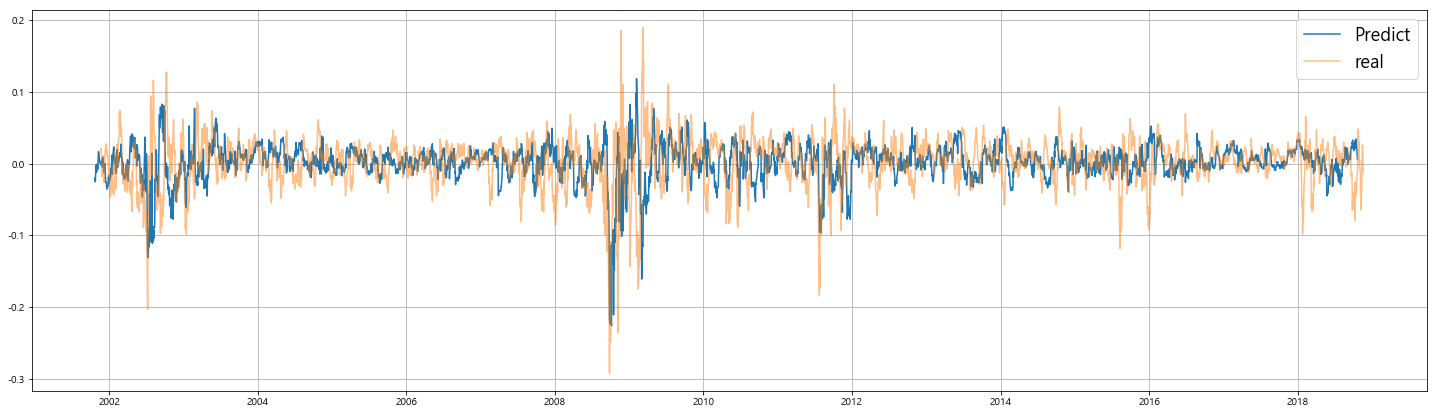

In [20]:
y = 'returnsCloseNext10'
plt.figure(figsize=(25,7))
plt.plot(result[y].shift(-20).dropna(), label='Predict', alpha=1)
plt.plot(sp500[y_li][y][result[y].dropna().index], label='real', alpha=.5)
plt.grid(True)
plt.legend(fontsize=18)